In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import numpy as np
sys.path.append('/Users/rubybyrne/rlb_MWA/sky_imaging')
import plot_fits
import plot_healpix_map
import healpix_utils
import scipy.io

In [3]:
base_path = '/Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/explore_diffuse_uv_planes'

In [18]:
uv_diffuse_model_xx = np.array(scipy.io.readsav(
    '{}/fhd_rlb_model_diffuse_May2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path)
)['grid_uv_model'])

In [28]:
uv_eor0_models = np.zeros((208, 208, 8), dtype=np.complex64)
for map_ind in range(1,9):
    uv_map = np.array(scipy.io.readsav(
        '{}/fhd_rlb_model_eor0_diffuse_map_{}_May2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind)
    )['grid_uv_model'])
    uv_eor0_models[:,:,map_ind-1] = uv_map

In [64]:
for map_ind in range(1,9):
    plot_array = np.abs(uv_eor0_models[:,:,map_ind-1])
    plt.figure(figsize=(8,8))
    plt.imshow(
        plot_array, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.0002, aspect='equal'
    )
    plt.title('')
    cbar = plt.colorbar()
    plt.savefig('/Users/rubybyrne/Downloads/uv_plane_xx_model{}.png'.format(map_ind))
    plt.close()

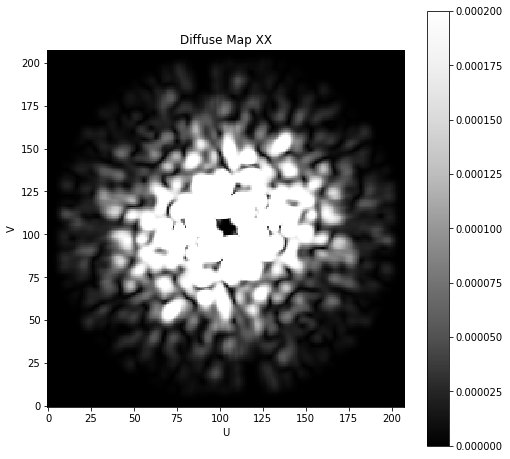

In [80]:
plot_array = np.abs(uv_diffuse_model_xx)
plt.figure(figsize=(8,8))
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.0002, aspect='equal'
)
plt.title('Diffuse Map XX')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()
plt.savefig('/Users/rubybyrne/Downloads/diffuse_map_uv_plane_xx.png')

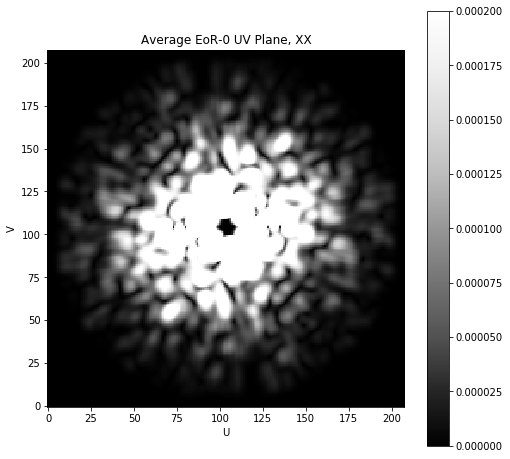

In [81]:
avg_uv = np.mean(uv_eor0_models, axis=2)
plt.figure(figsize=(8,8))
plt.imshow(
    np.abs(avg_uv), origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.0002, aspect='equal'
)
plt.title('Average EoR-0 UV Plane, XX')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()
plt.savefig('/Users/rubybyrne/Downloads/average_map_uv_plane_xx.png')

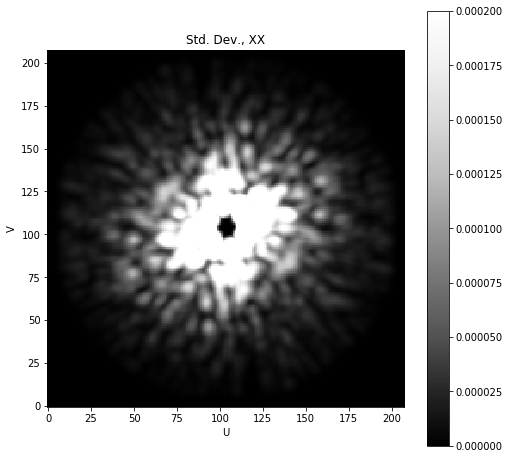

In [82]:
plt.figure(figsize=(8,8))
plt.imshow(
    np.std(uv_eor0_models, axis=2), origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.0002, aspect='equal'
)
plt.title('Std. Dev., XX')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()
plt.savefig('/Users/rubybyrne/Downloads/stddev_uv_plane_xx.png')

In [79]:
for map_ind in range(1,9):
    plot_array = np.abs(uv_eor0_models[:,:,map_ind-1]-avg_uv)
    plt.figure(figsize=(8,8))
    plt.imshow(
        plot_array, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.0002, aspect='equal'
    )
    plt.title('')
    cbar = plt.colorbar()
    #plt.show()
    plt.savefig('/Users/rubybyrne/Downloads/uv_plane_xx_model{}_minus_avg.png'.format(map_ind))
    plt.close()

In [71]:
std_uv = np.std(uv_eor0_models, axis=2)
print std_uv.shape

(208, 208)


In [54]:
avg_amp = np.mean(np.abs(uv_eor0_models), axis=2)
real_stddev = np.std(np.real(uv_eor0_models), axis=2)
imag_stddev = np.std(np.imag(uv_eor0_models), axis=2)
avg_stddev = (real_stddev+imag_stddev)/2

In [57]:
avg = np.mean(uv_eor0_models, axis=2)
dev = np.abs(uv_eor0_models-avg[:,:,np.newaxis])
stddev = np.mean(dev, axis=2)

/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


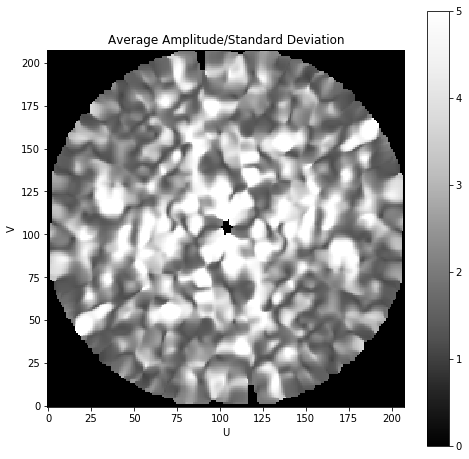

In [46]:
plot_array = avg_amp/avg_stddev
plot_array[np.where(avg_stddev ==0)]=0
plt.figure(figsize=(8,8))
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=5, aspect='equal'
)
plt.title('Average Amplitude/Standard Deviation')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()

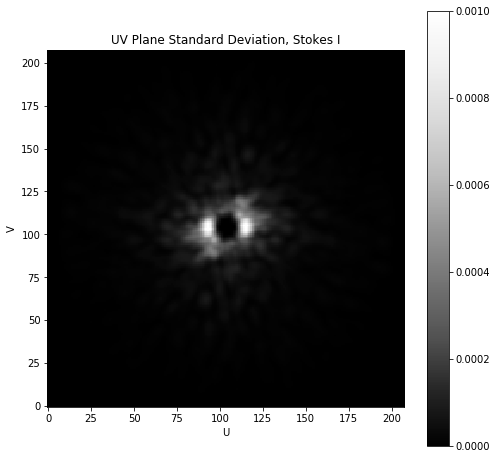

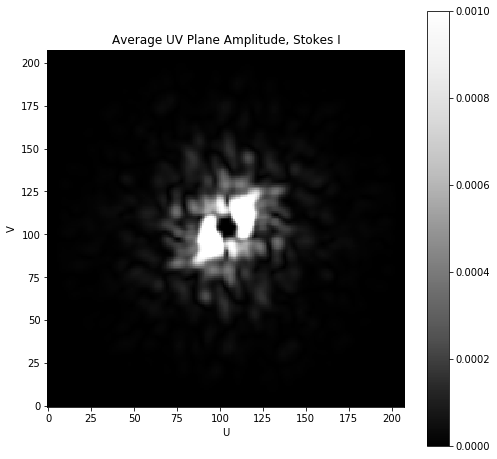

In [96]:
uv_eor0_models_I = np.zeros((208, 208, 8), dtype=np.complex64)
for map_ind in range(1,9):
    uv_map = np.array(scipy.io.readsav(
        '{}/fhd_rlb_model_eor0_diffuse_map_{}_StokesI_Jun2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind)
    )['grid_uv_model'])
    uv_eor0_models_I[:,:,map_ind-1] = uv_map
std_uv_I = np.std(uv_eor0_models_I, axis=2)
avg_uv_I = np.abs(np.mean(uv_eor0_models_I, axis=2))

plt.figure(figsize=(8,8))
plt.imshow(
    std_uv_I, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.001, aspect='equal'
)
plt.title('UV Plane Standard Deviation, Stokes I')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()

plt.figure(figsize=(8,8))
plt.imshow(
    avg_uv_I, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.001, aspect='equal'
)
plt.title('Average UV Plane Amplitude, Stokes I')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()

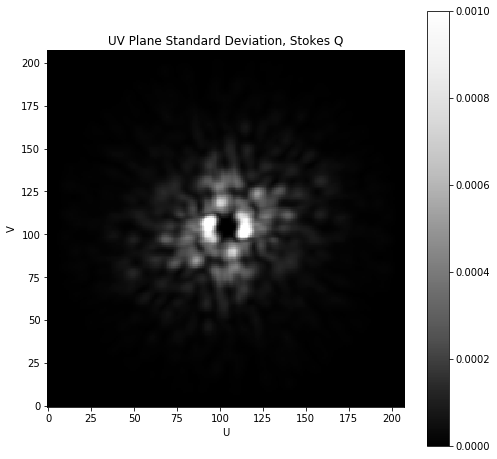

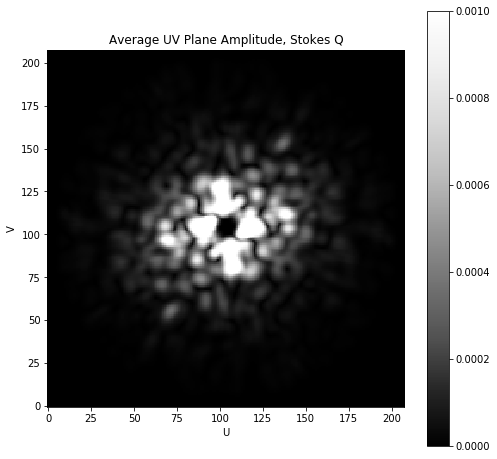

In [99]:
uv_eor0_models_Q = np.zeros((208, 208, 8), dtype=np.complex64)
for map_ind in range(1,9):
    uv_map = np.array(scipy.io.readsav(
        '{}/fhd_rlb_model_eor0_diffuse_map_{}_StokesQ_Jun2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind)
    )['grid_uv_model'])
    uv_eor0_models_Q[:,:,map_ind-1] = uv_map
std_uv = np.std(uv_eor0_models_Q, axis=2)
avg_uv = np.abs(np.mean(uv_eor0_models_Q, axis=2))

plt.figure(figsize=(8,8))
plt.imshow(
    std_uv, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.001, aspect='equal'
)
plt.title('UV Plane Standard Deviation, Stokes Q')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()

plt.figure(figsize=(8,8))
plt.imshow(
    avg_uv, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=.001, aspect='equal'
)
plt.title('Average UV Plane Amplitude, Stokes Q')
plt.xlabel('U')
plt.ylabel('V')
cbar = plt.colorbar()

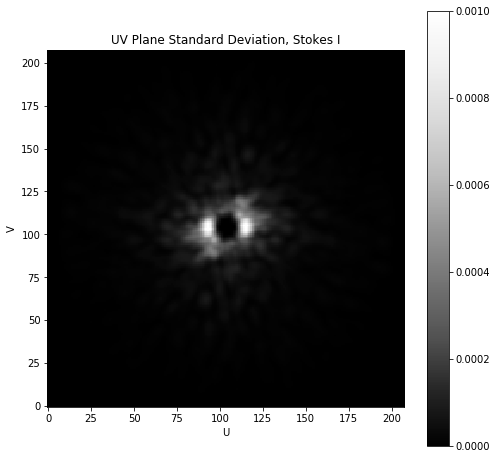

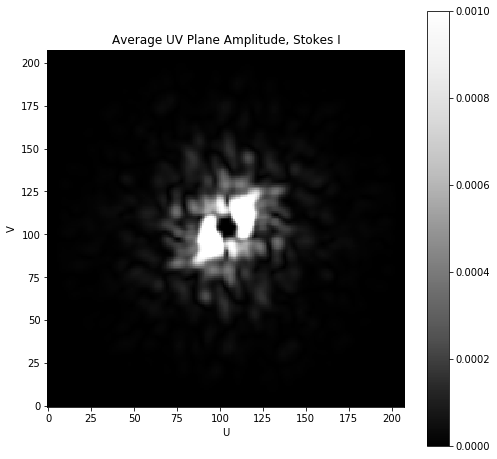

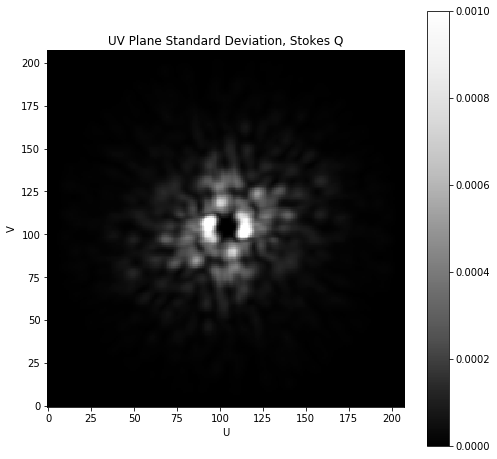

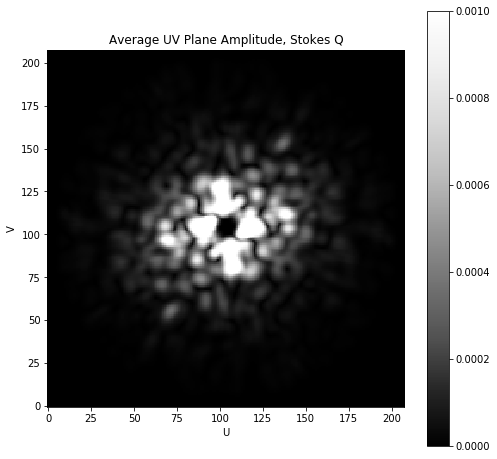

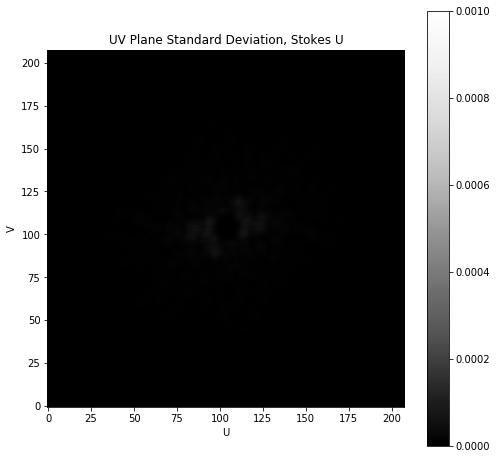

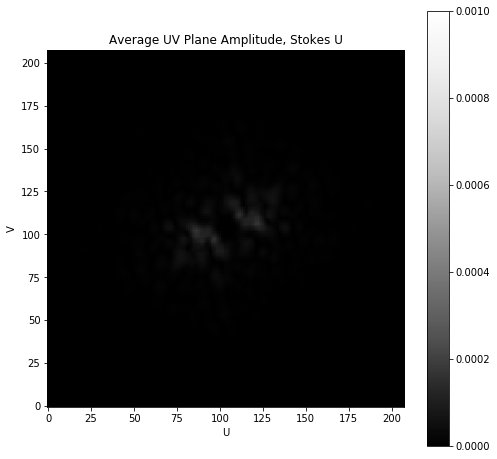

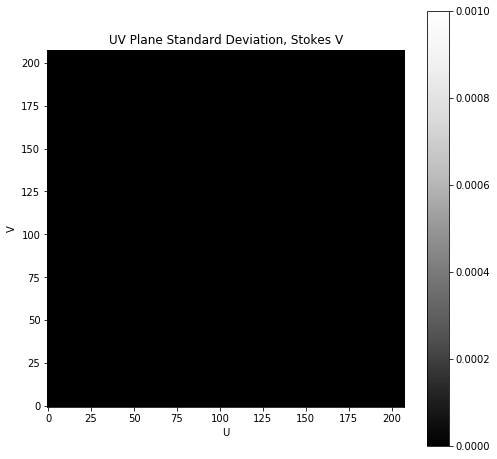

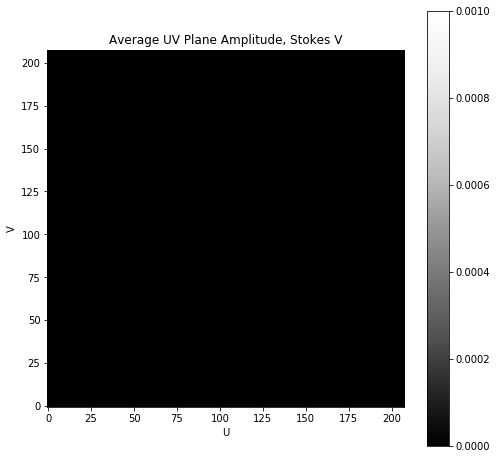

In [100]:
for pol in ['I','Q','U','V']:

    uv_eor0_models = np.zeros((208, 208, 8), dtype=np.complex64)
    for map_ind in range(1,9):
        uv_map = np.array(scipy.io.readsav(
            '{}/fhd_rlb_model_eor0_diffuse_map_{}_Stokes{}_Jun2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind, pol)
        )['grid_uv_model'])
        uv_eor0_models[:,:,map_ind-1] = uv_map
    std_uv = np.std(uv_eor0_models, axis=2)
    avg_uv = np.abs(np.mean(uv_eor0_models, axis=2))

    plt.figure(figsize=(8,8))
    plt.imshow(
        std_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.001, aspect='equal'
    )
    plt.title('UV Plane Standard Deviation, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()

    plt.figure(figsize=(8,8))
    plt.imshow(
        avg_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.001, aspect='equal'
    )
    plt.title('Average UV Plane Amplitude, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()

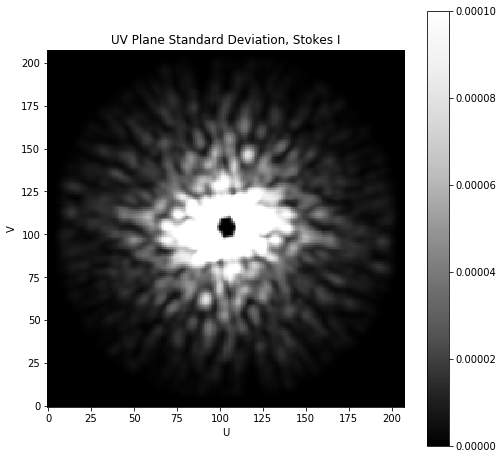

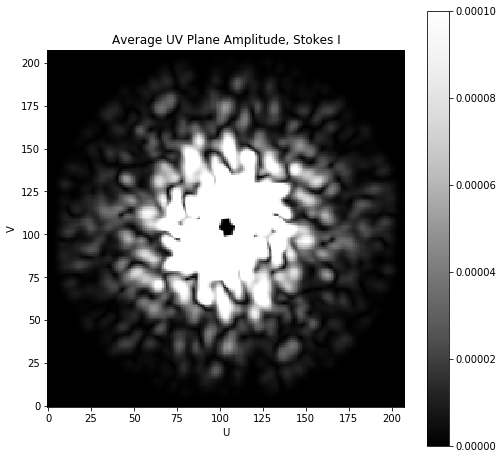

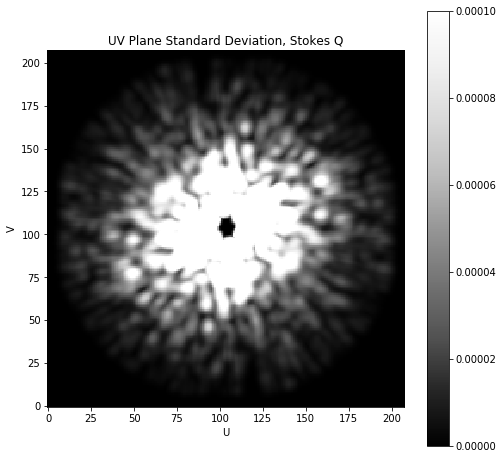

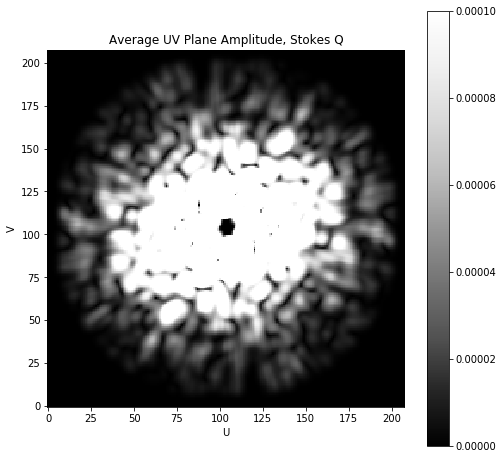

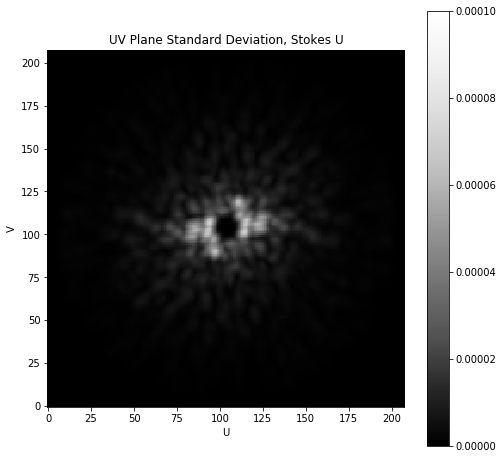

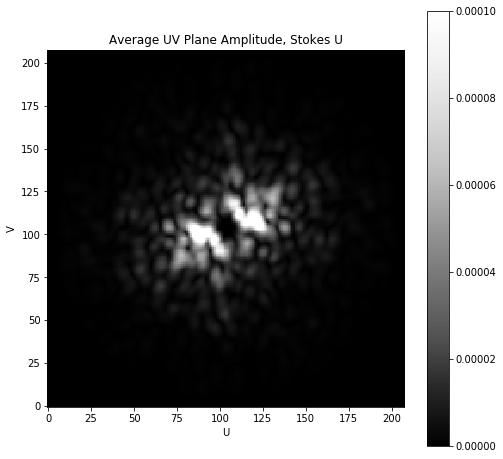

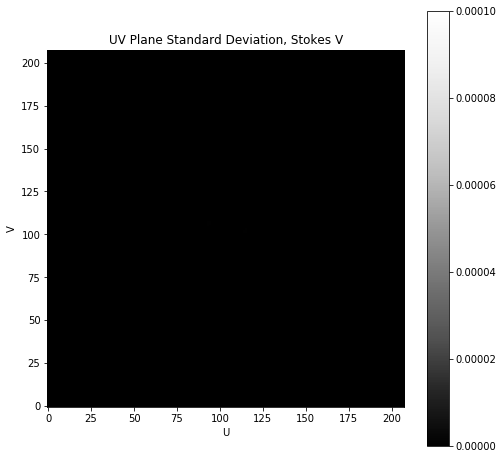

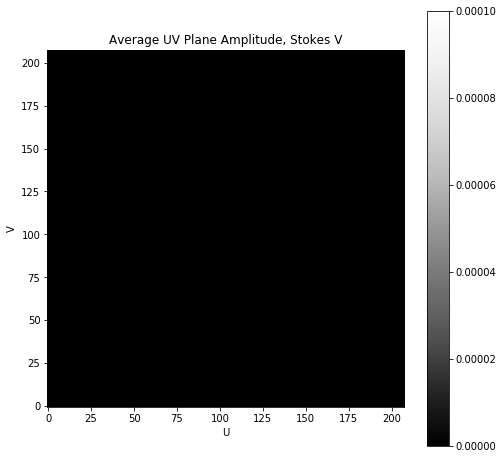

In [101]:
for pol in ['I','Q','U','V']:

    uv_eor0_models = np.zeros((208, 208, 8), dtype=np.complex64)
    for map_ind in range(1,9):
        uv_map = np.array(scipy.io.readsav(
            '{}/fhd_rlb_model_eor0_diffuse_map_{}_Stokes{}_Jun2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind, pol)
        )['grid_uv_model'])
        uv_eor0_models[:,:,map_ind-1] = uv_map
    std_uv = np.std(uv_eor0_models, axis=2)
    avg_uv = np.abs(np.mean(uv_eor0_models, axis=2))

    plt.figure(figsize=(8,8))
    plt.imshow(
        std_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.0001, aspect='equal'
    )
    plt.title('UV Plane Standard Deviation, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()

    plt.figure(figsize=(8,8))
    plt.imshow(
        avg_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=.0001, aspect='equal'
    )
    plt.title('Average UV Plane Amplitude, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()

3.1284392e-07


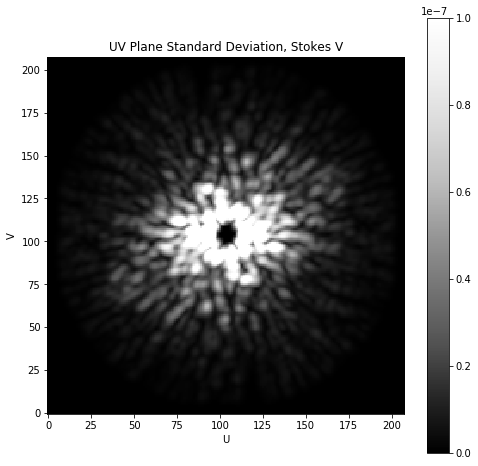

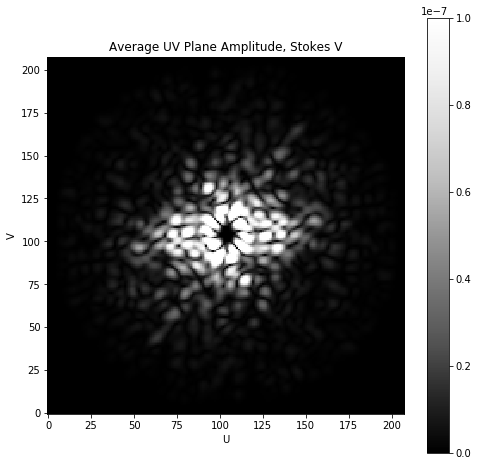

In [105]:
for pol in ['V']:

    uv_eor0_models = np.zeros((208, 208, 8), dtype=np.complex64)
    for map_ind in range(1,9):
        uv_map = np.array(scipy.io.readsav(
            '{}/fhd_rlb_model_eor0_diffuse_map_{}_Stokes{}_Jun2020/grid_data/1061316296_uv_model_XX.sav'.format(base_path, map_ind, pol)
        )['grid_uv_model'])
        uv_eor0_models[:,:,map_ind-1] = uv_map
    std_uv = np.std(uv_eor0_models, axis=2)
    avg_uv = np.abs(np.mean(uv_eor0_models, axis=2))
    print np.max(avg_uv)

    plt.figure(figsize=(8,8))
    plt.imshow(
        std_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=1e-7, aspect='equal'
    )
    plt.title('UV Plane Standard Deviation, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()

    plt.figure(figsize=(8,8))
    plt.imshow(
        avg_uv, origin='lower', interpolation='none',
        cmap='Greys_r',
        vmin=0, vmax=1e-7, aspect='equal'
    )
    plt.title('Average UV Plane Amplitude, Stokes {}'.format(pol))
    plt.xlabel('U')
    plt.ylabel('V')
    cbar = plt.colorbar()